<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-de-Python-BEDU/blob/main/bedu_proyecto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Python Equipo 8


    Intercalar texto con código, de manera que podamos ir "guiando" al lector a través de nuestro hilo de pensamiento. Explicarle a alguien todo lo que has hecho usando solamente un Jupyter Notebook. Todo debe de estar clarificado en el Notebook.

## Introducción

    Asegúrate de empezar con una introducción donde hables acerca del tema que te llamó la atención. Explica por qué quisiste abordar este tema, cuáles fueron tus preguntas iniciales, y el problema que te gustaría resolver.

## Colección de Datos

### Obtencion de datos mediante API

El gobierno de México utiliza el sistema de repositorios de datos abiertos [CKAN](https://datos.gob.mx/blog/ckan?category=api-cdn&tag=educacion) para compartir los Datos Abiertos de las dependencias de la Administración Pública Federal, así como de gobiernos locales.

Utilizando la API de CKAN es posible consultar los detalles de los conjuntos de datos que se ofrecen en el portal datos.gob.mx/busca

De esta forma, mediante peticiones a esta API podemos obtener la URL del conjunto de datos.

In [1]:
import pandas as pd
import requests

El endpoint para consultar datos es:

https://datos.gob.mx/busca/api/3/action/package_search?q=BUSQUEDA 

Por lo que pasaremos el valor "desaparecidos" al parametro q, para obtener los datasets relacionados.

In [2]:
endpoint = 'https://datos.gob.mx/busca/api/3/action/package_search?'
payload = {'q': 'desaparecidos'}

In [3]:
r = requests.get(endpoint, params=payload)

In [4]:
r.status_code

200

| La petición se ha realizado con éxito

In [5]:
json = r.json()

In [6]:
json.keys()

dict_keys(['help', 'success', 'result'])

La llave *'result'* es la que nos interesa, exploraremos su contenido para identificar el conjunto de datos que buscamos.

In [7]:
for key in json['result']['results']:
    print(key['name'])

estadisticas-de-apoyo-y-proteccion-a-detenidos-y-desaparecidos
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-3
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-2
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-1
registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped-sitio-espejo-4
cantidad-de-derechohabientes-beneficiados-por-el-programa-integral-de-becas-para-hijos-de-milit


| El conjunto de datos que buscamos se encuentra en *'registro-nacional-de-datos-de-personas-extraviadas-o-desaparecidas-rnped'* con indice 1.

Ahora bsucaremos el conjunto de datos dentro de este diccionario.

In [8]:
for key in json['result']['results'][1]['resources']:
    print(f"Nombre del Dataset: {key['name']} \nURL: {key['url']} \n")

Nombre del Dataset: Base de datos del RNPED del fuero común 
URL: https://secretariadoejecutivo.gob.mx/transparencia/datos_abiertos/RNPEDFC.csv 

Nombre del Dataset: Base de datos del RNPED del fuero federal 
URL: https://secretariadoejecutivo.gob.mx/docs/datos_abiertos/RNPEDFF__1.csv 



| Nuestro conjunto de datos es *'Base de datos del RNPED del fuero común'* con indice 0.

**Guardamos la URL de nuestro conjunto y leemos el archivo .csv**

In [9]:
url = json['result']['results'][1]['resources'][0]['url']

In [11]:
raw = pd.read_csv(url, encoding='ISO-8859-1')

**Guardamos la versión RAW de los datos en fromato csv y leemos el archivo**

In [12]:
raw.to_csv('RNPEDFC.csv', index=False, encoding='ISO-8859-1')

In [14]:
df = pd.read_csv('RNPEDFC.csv', encoding='ISO-8859-1')

In [15]:
df

,Fecha en que se le vio por ultima vez,Hora en que se le vio por ultima vez,Pais en que se le vio por ultima vez,Entidad en que se le vio por ultima vez,Municipio en que se le vio por ultima vez,Localidad en que se le vio por ultima vez,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
0,2012-03-18,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
1,2007-02-05,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
2,2009-03-14,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,2006-12-23,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,2008-01-11,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,2018-04-26,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36261,2018-01-08,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36262,2015-02-02,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36263,2017-08-22,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA


## Análisis Exploratorio

    
    Leer nuestro dataset en un DataFrame de pandas.
    Realizar Análisis Exploratorio de Datos básico para conocer algunas de las características de nuestro conjunto de datos.
    
    Algunas de las preguntas que estamos intentando responder en esta exploración son las siguientes:

    ¿El conjunto de datos que tengo realmente me sirve para responder algunas de las preguntas que me planteé?
    ¿Qué tamaño tiene mi conjunto de datos? ¿Serán datos suficientes?
    ¿Qué columnas tengo y qué información tengo en cada una de esas columnas?
    Los nombres que tienen mis columnas, ¿son el nombre más apropiado?
    ¿Qué tipos de datos tengo en cada columna? ¿Parecen ser el tipo correcto de datos? ¿O es un tipo de datos "incorrecto"?
    Si selecciono algunas filas al azar y las observo, ¿estoy obteniendo los datos que debería? ¿O hay datos que parecen estar "sucios" o "incorrectos"?

    Responde estas preguntas usando las técnicas que aprendiste en esta sesión y comparte tus hallazgos con tus compañeros y la experta.

In [4]:
df.shape

(36265, 15)

#### Conteo de valores "NO ESPECIFICADO" por columna

In [7]:
print(f'{("Columna"):42} =NO ESPECIFICADO= \n')
for col in df.columns:
    print(f'{(col):42} | {(df[col] == "NO ESPECIFICADO").sum()}')

Columna                                    =NO ESPECIFICADO= 

Fecha en que se le vio por ultima vez      | 338
Hora en que se le vio por ultima vez       | 16
Pais en que se le vio por ultima vez       | 0
Entidad en que se le vio por ultima vez    | 29
Municipio en que se le vio por ultima vez  | 668
Localidad en que se le vio por ultima vez  | 3413
Nacionalidad                               | 2040
Estatura                                   | 11007
Complexion                                 | 10569
Sexo                                       | 0
Edad                                       | 3156
Descripcion de senas particulares          | 18914
Etnia                                      | 36133
Discapacidad                               | 1047
Dependencia que envio la informacion       | 0


## Limpieza de datos y agregaciones

    - Explora tu dataset con el fin de encontrar los NaNs que contiene. Piensa en la distribución de NaNs por columna y por fila.
    
    - Piensa cuáles son los procedimientos que puedes aplicar a tus NaNs. ¿Tenemos que eliminar las filas/columnas que tienen esos NaNs? ¿O podríamos rellenar esos NaNs con algún valor de manera que podamos retener esas filas/columnas?
    
    - Limpia tu dataset de manera que no quede ningún NaN.
    
    - Reindexa tu dataset si lo consideras necesario.
    
    - Renombra tus columnas si lo consideras necesario.
    
    - Prueba aplicar agregaciones a tu DataFrame para ver si puedes empezar a responder algunas de las preguntas que te planteaste anteriormente. 
    


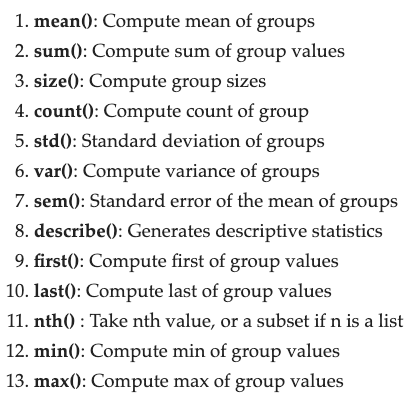

## Automatización y APIs

    Puede que sea un API que complemente tu dataset original (eso sería lo mejor de lo mejor)

     Puedes también explorar la posibilidad de automatizar algunos de los procesos de limpieza que has realizado con tu dataset. Si encuentras dónde podría ser útil y te animas a hacerlo, recuerda proteger tu código con estructuras try except para que la automatización no falle.

## Transformación, filtración y ordenamiento de datos


    - Checa que todos tus datos tengan el tipo de dato correcto. Si no es así, usa casting para convertir tus datos al tipo de dato correcto (recuerda que tipos de dato como datetime64 se guardan como strings cuando están en archivos .csv, así que tendrás que convertirlos al tipo de dato apropiado cada vez que importes tu archivo.)
    
    - Si tienes columnas de texto, asegúrate de que todas tengan el formato correcto. Si no es así, utiliza las técnicas de manipulación de strings para darles el formato que necesitas.
    
    - Si consideras que alguna de tus columnas sería más clara si los datos tuvieran otro formato o representación usa map para transformar los datos de esa columna.
    
    - Si crees que es posible generar nuevas columnas útiles a partir de las columnas que ya tienes, usa apply para generar nuevos datos a partir de los que tienes y añádelos a tu dataset.
    
    - Con el fin de responder algunas de las preguntas que te planteaste acerca de tu dataset, usa filtros y sorting para crear nuevos subconjuntos y reordenamientos que sean más adecuados para responder tus preguntas. Primero comienza intentando responder las preguntas que te planteaste al principio, pero después puedes solamente explorar para ver si encuentras otras preguntas que no te habías planteado anteriormente.
